In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from ipywidgets import interact
import ipywidgets as widgets

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

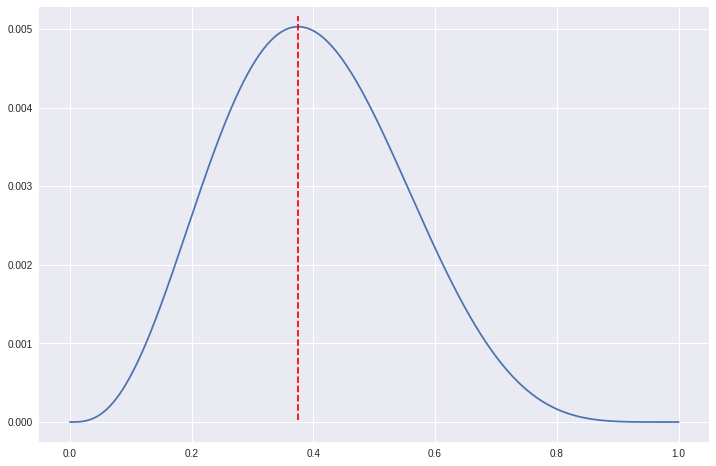

In [2]:
#plot of likelihood function
#x
mu1 = 0
mu2 = 1
p = np.linspace(0, 1, 1000)

y1 = (np.power(p, 3) * (np.power((1 - p), 5)))
plt.plot(p, y1)
plt.axvline(x=0.375, color='r', linestyle='--', ymin=0.05, ymax = 0.98)

In [0]:
import pickle
data = pickle.load(open('data.pickle', 'rb'))

In [0]:
from scipy.stats import multivariate_normal

mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])
standard_kernel = multivariate_normal(mean=mean, cov=cov)


In [0]:
def estimateProbability(x, h):
  fac = 0
  for i in (data):
    fac += standard_kernel.pdf((i-x)/h)
  return fac / (len(data)*h**2)

In [0]:
def plot_density_distr(h):
  %matplotlib inline
  #Create grid and multivariate normal
  x = np.arange(-400, 400, 10)
  y = np.arange(-400, 400, 10)
  X, Y = np.meshgrid(x, y)
  pos = np.empty(X.shape + (2,))
  pos[:, :, 0] = X; pos[:, :, 1] = Y
  rv = estimateProbability(pos, h)
  #Make a 3D plot
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X, Y, rv, cmap='viridis', linewidth=0)
  plt.title('h='+str(h))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

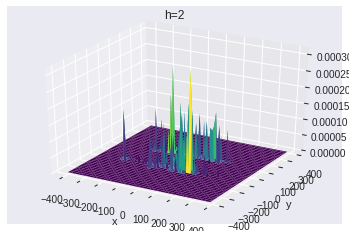

In [7]:
plot_density_distr(2)

In [8]:
interact(plot_density_distr, h=20)

interactive(children=(IntSlider(value=20, description='h', max=60, min=-20), Output()), _dom_classes=('widget-…

<function __main__.plot_density_distr>